On retraite la donnée

Les bibliotheques

In [17]:
import pandas as pd

In [18]:
path = "ttf_data_censoring.csv"
df = pd.read_csv(path)

print(df)

    stress_1 - 120 degree stress_2 - 130 degree stress_3 - 140 degree
0                  321.35                136.84                 82.55
1                  400.31                167.68                101.86
2                  497.12                204.88                 125.3
3                  497.14                204.88                 125.3
4                  514.82                211.62                129.56
5                  533.72                218.79                 134.1
6                  614.26                249.17                 153.4
7                  705.41                283.19                 175.1
8                  706.39                283.56                175.33
9                  750.67                299.96                185.82
10                 761.22                303.86                188.32
11                 811.06                322.22                 200.1
12                  831.3                329.64                204.87
13                 9

Prétraitement de la data

In [49]:
data = df['stress_1 - 120 degree'].tolist() + df['stress_2 - 130 degree'].tolist() + df['stress_3 - 140 degree'].tolist()

print(data)
def dif_liste(data):
    data = [str(val) for val in data]
    sans_etoile = [float(val) for val in data if '(*)' not in val]
    avec_etoile = [float(val.split()[0]) for val in data if '(*)' in val]
    liste_tout = sans_etoile + avec_etoile
    return [liste_tout] + [avec_etoile]

data = dif_liste(data)
print (data)

[321.35, 400.31, 497.12, 497.14, 514.82, 533.72, 614.26, 705.41, 706.39, 750.67, 761.22, 811.06, 831.3, 903.99, 932.97, '136.84', '167.68', '204.88', '204.88', '211.62', '218.79', '249.17', '283.19', '283.56', '299.96', '303.86', '322.22', '329.64', '356.22', '360 (*)', '82.55', '101.86', '125.3', '125.3', '129.56', '134.1', '153.4', '175.1', '175.33', '185.82', '188.32', '200.1', '204.87', '205 (*)', '205 (*)']
[[321.35, 400.31, 497.12, 497.14, 514.82, 533.72, 614.26, 705.41, 706.39, 750.67, 761.22, 811.06, 831.3, 903.99, 932.97, 136.84, 167.68, 204.88, 204.88, 211.62, 218.79, 249.17, 283.19, 283.56, 299.96, 303.86, 322.22, 329.64, 356.22, 82.55, 101.86, 125.3, 125.3, 129.56, 134.1, 153.4, 175.1, 175.33, 185.82, 188.32, 200.1, 204.87, 360.0, 205.0, 205.0], [360.0, 205.0, 205.0]]


On fit a une loi

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 15/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         719.431         46.3871   634.024   816.342
     Beta          4.2167        0.882062   2.79844   6.35374 

Goodness of fit   Value
 Log-likelihood -98.875
           AICc  202.75
            BIC 203.166
             AD 1.10436 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 15/1 (6.25% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         297.252          18.266   263.523   335.297
     Beta         4.32985         0.92545     2.848   6.58274 

Goodness of fit    Value
 Log-likelihood -86.5048
           AICc  177.933
            BIC  178.555
             AD   4.1494 

Results from Fit_Weibull_2P (95% CI):
Analysis metho

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\eusta\AppData\Local\Temp\ipykernel_9600\4139190066.py", line 24, in <module>
    weibull_fit2.plot()
    ^^^^^^^^^^^^^^^^^
AttributeError: 'Fit_Weibull_2P' object has no attribute 'plot'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\ultratb.py"

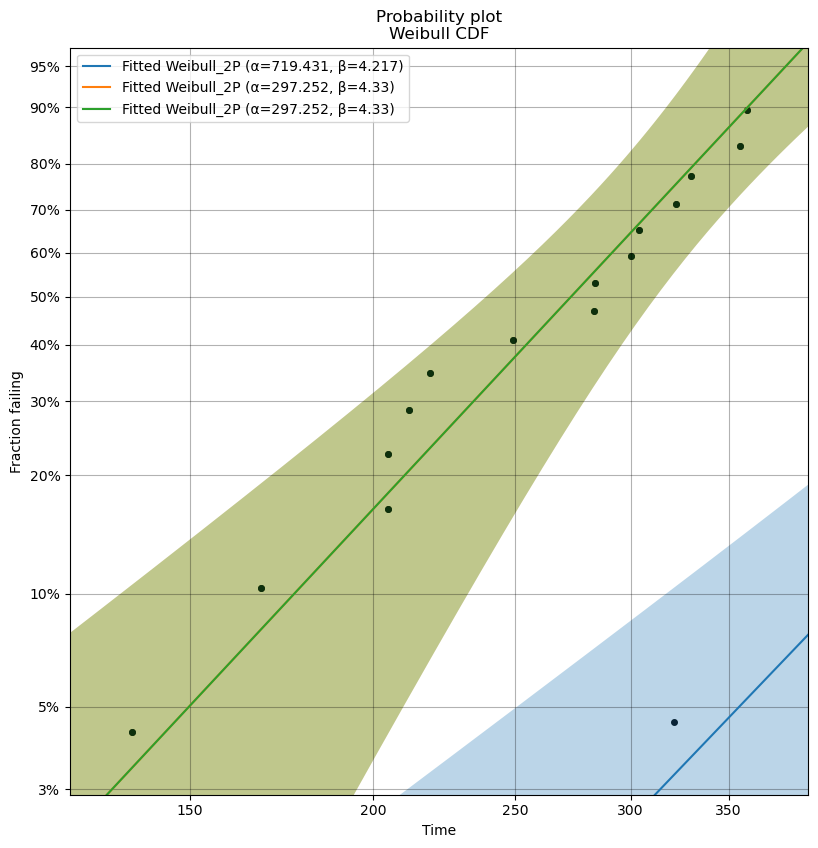

In [46]:
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

# Ajustement à une loi de Weibull
weibull_fit1 = Fit_Weibull_2P(failures=data1[0], right_censored=data1[1], show_probability_plot=True)
weibull_fit2 = Fit_Weibull_2P(failures=data2[0], right_censored=data2[1], show_probability_plot=True)
weibull_fit3 = Fit_Weibull_2P(failures=data3[0], right_censored=data3[1], show_probability_plot=True)

# Affichage des paramètres
print("Paramètres estimés 1 :")
print(f"Forme (Beta) : {weibull_fit1.beta}")
print(f"Échelle (Alpha) : {weibull_fit1.alpha}")  # Utilisation d'alpha pour l'échelle

print("Paramètres estimés 2 :")
print(f"Forme (Beta) : {weibull_fit2.beta}")
print(f"Échelle (Alpha) : {weibull_fit2.alpha}")  # Utilisation d'alpha pour l'échelle

print("Paramètres estimés 3 :")
print(f"Forme (Beta) : {weibull_fit3.beta}")
print(f"Échelle (Alpha) : {weibull_fit3.alpha}")  # Utilisation d'alpha pour l'échelle

# Tracé de l'ajustement
#weibull_fit1.plot()
weibull_fit2.plot()
#weibull_fit3.plot()
